In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
img1 = cv.imread('1gray.jpeg', 0)

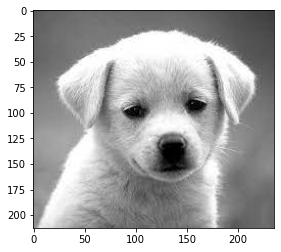

In [ ]:
plt.imshow(img1, cmap='gray')

In [ ]:
img1.shape

(213, 236)

The detect_edges_erosion function is a Python code snippet that performs image edge detection using the erosion technique. It takes an input image and applies the erosion operation to identify the edges present in the image.

The code follows the following steps:

The input image is assumed to be in grayscale format. The code assigns the input image to the variable gray.

A 3x3 kernel is defined using NumPy, which has a center value of 1 and surrounding values of 0. This kernel is used for the erosion operation.

The cv.erode function from the OpenCV library is used to apply the erosion operation to the gray image, using the defined kernel and a single iteration.

In [ ]:
def detect_edges_erosion(image):
    gray = image

    kernel = np.array([[0, 1, 0],[1, 1, 1], [0, 1, 0]], dtype = 'uint8')
    eroded = cv.erode(gray, kernel, iterations=1)
    edges = cv.absdiff(image, eroded)

    return eroded, edges

The detect_edges_dilation function is a Python code snippet that performs image edge detection using the dilation technique. It takes an input image and applies the dilation operation to identify the edges present in the image.

The code follows the following steps:

The input image is assumed to be in grayscale format. The code assigns the input image to the variable gray.

A 3x3 kernel is defined using NumPy, which has a center value of 1 and surrounding values of 0. This kernel is used for the dilation operation.

The cv.dilate function from the OpenCV library is used to apply the dilation operation to the gray image, using the defined kernel and a single iteration.

In [ ]:
def detect_edges_dilation(image):
    gray = image

    kernel = np.array([[0, 1, 0],[1, 1, 1], [0, 1, 0]], dtype = 'uint8')
    dilated = cv.dilate(gray, kernel, iterations=1)
    edges = cv.absdiff(image, dilated)

    return dilated, edges

The detect_edges_combine function is a Python code snippet that performs image edge detection by combining the results of dilation and erosion operations. It takes an input image and applies both dilation and erosion operations to identify the edges present in the image.

The code follows the following steps:

The input image is assumed to be in grayscale format. The code assigns the input image to the variable gray.

A 3x3 kernel is defined using NumPy, which has a center value of 1 and surrounding values of 0. This kernel is used for both the dilation and erosion operations.

The cv.dilate function from the OpenCV library is used to apply the dilation operation to the gray image, using the defined kernel and a single iteration. This helps to expand the edges in the image.

The cv.erode function from the OpenCV library is used to apply the erosion operation to the gray image, using the defined kernel and a single iteration. This helps to shrink the edges in the image.

The cv.absdiff function is used to calculate the absolute difference between the eroded and dilated images. This helps to highlight the edges detected by the combined dilation and erosion operations.

The function returns the detected edges (edges).

The code assumes that the necessary libraries (cv2 and numpy) have been imported prior to executing the detect_edges_combine function.








In [ ]:
def detect_edges_combine(image):
    gray = image

    kernel = np.array([[0, 1, 0],[1, 1, 1], [0, 1, 0]], dtype = 'uint8')
    dilated = cv.dilate(gray, kernel, iterations=1)
    eroded = cv.erode(gray, kernel, iterations=1)
    edges = cv.absdiff(eroded, dilated)

    return edges

In [ ]:
binary = cv.adaptiveThreshold(img1, 255,
	cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 10)

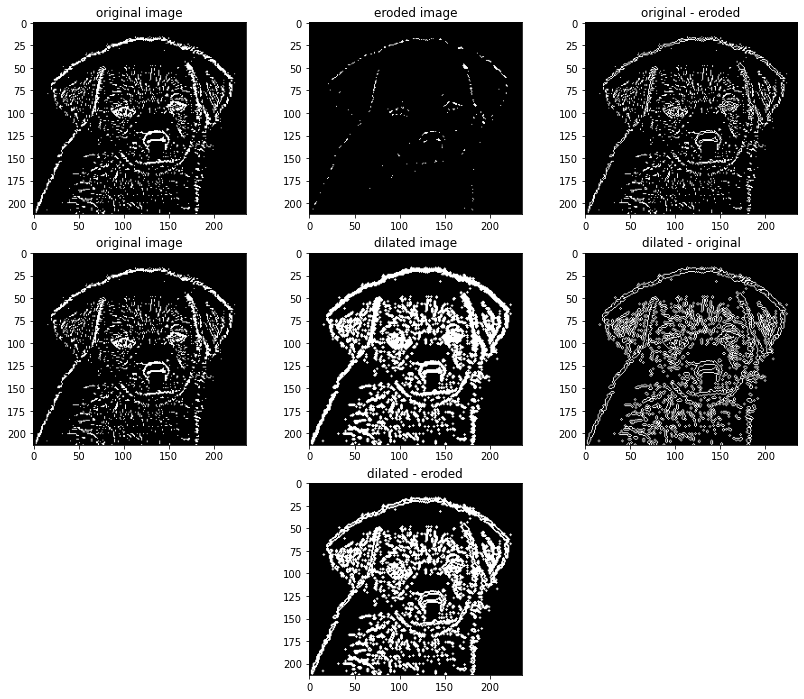

In [ ]:
plt.figure(figsize=(14, 12))
plt.subplot(3, 3, 1)
plt.title('original image')
plt.imshow(binary, cmap = 'gray')
eroded, edges = detect_edges_erosion(binary)
plt.subplot(3, 3, 2)
plt.title('eroded image')
plt.imshow(eroded, cmap = 'gray')

plt.subplot(3, 3, 3)
plt.title('original - eroded')
plt.imshow(edges, cmap = 'gray')


plt.subplot(3, 3, 4)
plt.title('original image')
plt.imshow(binary, cmap = 'gray')
dilated, edges = detect_edges_dilation(binary)

plt.subplot(3, 3, 5)
plt.title('dilated image')
plt.imshow(dilated, cmap = 'gray')

plt.subplot(3, 3, 6)
plt.title('dilated - original')
plt.imshow(edges, cmap = 'gray')

plt.subplot(3, 3, 8)
plt.title('dilated - eroded')
plt.imshow(detect_edges_combine(binary), cmap = 'gray')

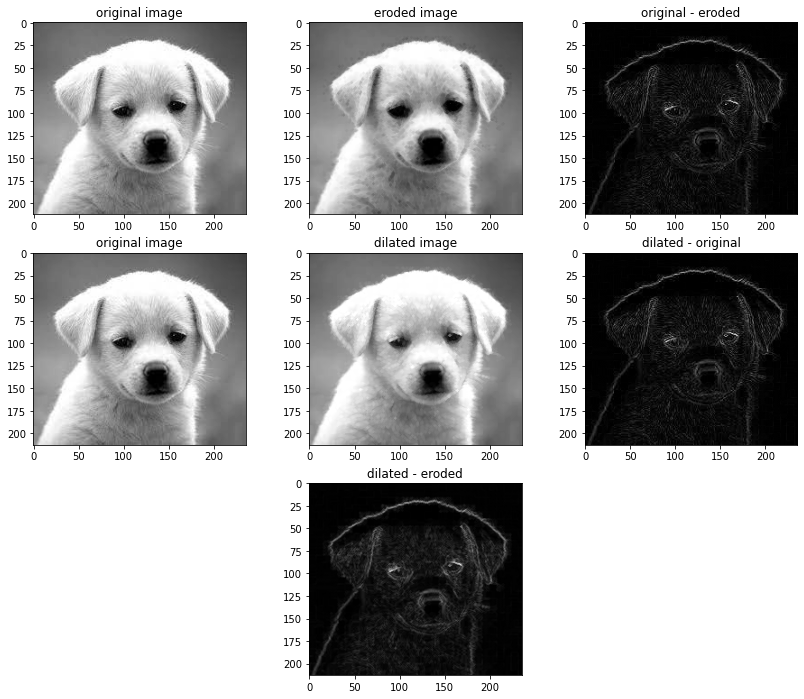

In [ ]:
plt.figure(figsize=(14, 12))
plt.subplot(3, 3, 1)
plt.title('original image')
plt.imshow(img1, cmap = 'gray')
eroded, edges = detect_edges_erosion(img1)
plt.subplot(3, 3, 2)
plt.title('eroded image')
plt.imshow(eroded, cmap = 'gray')

plt.subplot(3, 3, 3)
plt.title('original - eroded')
plt.imshow(edges, cmap = 'gray')


plt.subplot(3, 3, 4)
plt.title('original image')
plt.imshow(img1, cmap = 'gray')
dilated, edges = detect_edges_dilation(img1)

plt.subplot(3, 3, 5)
plt.title('dilated image')
plt.imshow(dilated, cmap = 'gray')

plt.subplot(3, 3, 6)
plt.title('dilated - original')
plt.imshow(edges, cmap = 'gray')

plt.subplot(3, 3, 8)
plt.title('dilated - eroded')
plt.imshow(detect_edges_combine(img1), cmap = 'gray')

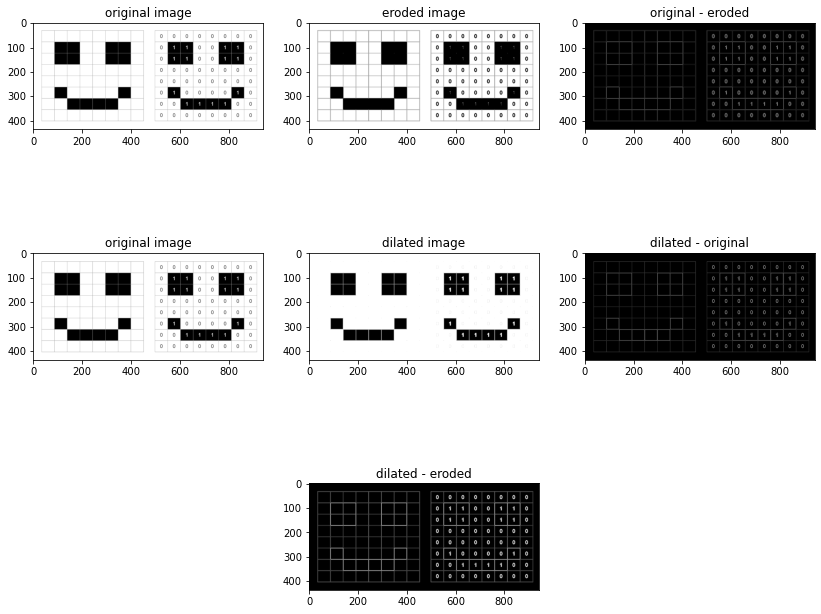

In [ ]:
img2 = cv.imread('1binary.png', 0)
plt.figure(figsize=(14, 12))
plt.subplot(3, 3, 1)
plt.title('original image')
plt.imshow(img2, cmap = 'gray')
eroded, edges = detect_edges_erosion(img2)
plt.subplot(3, 3, 2)
plt.title('eroded image')
plt.imshow(eroded, cmap = 'gray')

plt.subplot(3, 3, 3)
plt.title('original - eroded')
plt.imshow(edges, cmap = 'gray')


plt.subplot(3, 3, 4)
plt.title('original image')
plt.imshow(img2, cmap = 'gray')
dilated, edges = detect_edges_dilation(img2)

plt.subplot(3, 3, 5)
plt.title('dilated image')
plt.imshow(dilated, cmap = 'gray')

plt.subplot(3, 3, 6)
plt.title('dilated - original')
plt.imshow(edges, cmap = 'gray')

plt.subplot(3, 3, 8)
plt.title('dilated - eroded')
plt.imshow(detect_edges_combine(img2), cmap = 'gray')

The log_filter function takes an input grayscale image and a sigma value as parameters.

It applies a Gaussian blur to the image using the specified sigma value.

Next, it applies the Laplacian of Gaussian (LoG) filter to the blurred image.

The filtered image is then normalized to the 8-bit range (0-255) for visualization purposes.

In [ ]:

def log_filter(image, sigma):
    blurred = cv.GaussianBlur(image, (0, 0), sigma)

    filtered = cv.Laplacian(blurred, cv.CV_64F)

    filtered = cv.normalize(filtered, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)

    return filtered

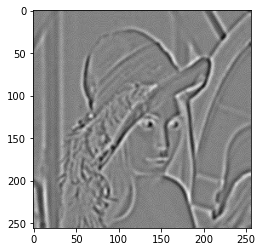

In [ ]:
lenna = cv.imread('lena.tif')
edges_log = log_filter(lenna, 2)
plt.imshow(edges_log, cmap='gray')

The fill_holes3 function is a Python code snippet that fills the holes in a binary image. It takes an input image and performs the following steps to fill the holes:

A threshold operation is applied to the input image using the cv.threshold function from the OpenCV library. The threshold value of 1 is used to convert the image into a binary image, where pixels with intensity values greater than 1 are set to 255 (white) and pixels with intensity values less than or equal to 1 are set to 0 (black). The cv.THRESH_BINARY_INV flag is used to invert the binary image, so that the holes become white and the foreground becomes black. The resulting binary image is stored in the mask variable.

The cv.findContours function is used to find the contours in the inverted binary image (mask). The cv.RETR_EXTERNAL flag specifies that only the external contours are retrieved, and the cv.CHAIN_APPROX_SIMPLE flag specifies that the contour points are approximated using the simple method. The contours are stored in the contours variable.

A copy of the original image (image) is created and stored in the filled_image variable.

The cv.drawContours function is used to draw the contours on the filled_image using the contours variable. The -1 parameter indicates that all contours should be drawn. The (255, 255, 255) tuple represents the color of the filled contours, which is white. The thickness=cv.FILLED flag indicates that the contours should be filled rather than outlined.

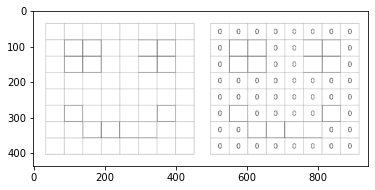

In [ ]:
import numpy as np

def fill_holes3(image):
    _, mask = cv.threshold(image, 1, 255, cv.THRESH_BINARY_INV)
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    filled_image = image.copy()
    cv.drawContours(filled_image, contours, -1, (255, 255, 255), thickness=cv.FILLED)
    return filled_image

a = fill_holes3(img2)

plt.imshow(a, cmap='gray')